###### Credit : Jose Portilla, Pierian Data (pieriantraining.com)

## Data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_stocks = pd.read_pickle('all_banks')

In [3]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

* Returns, defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [5]:
returns = pd.DataFrame()

In [6]:
for tick in tickers :
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [7]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


## EDA

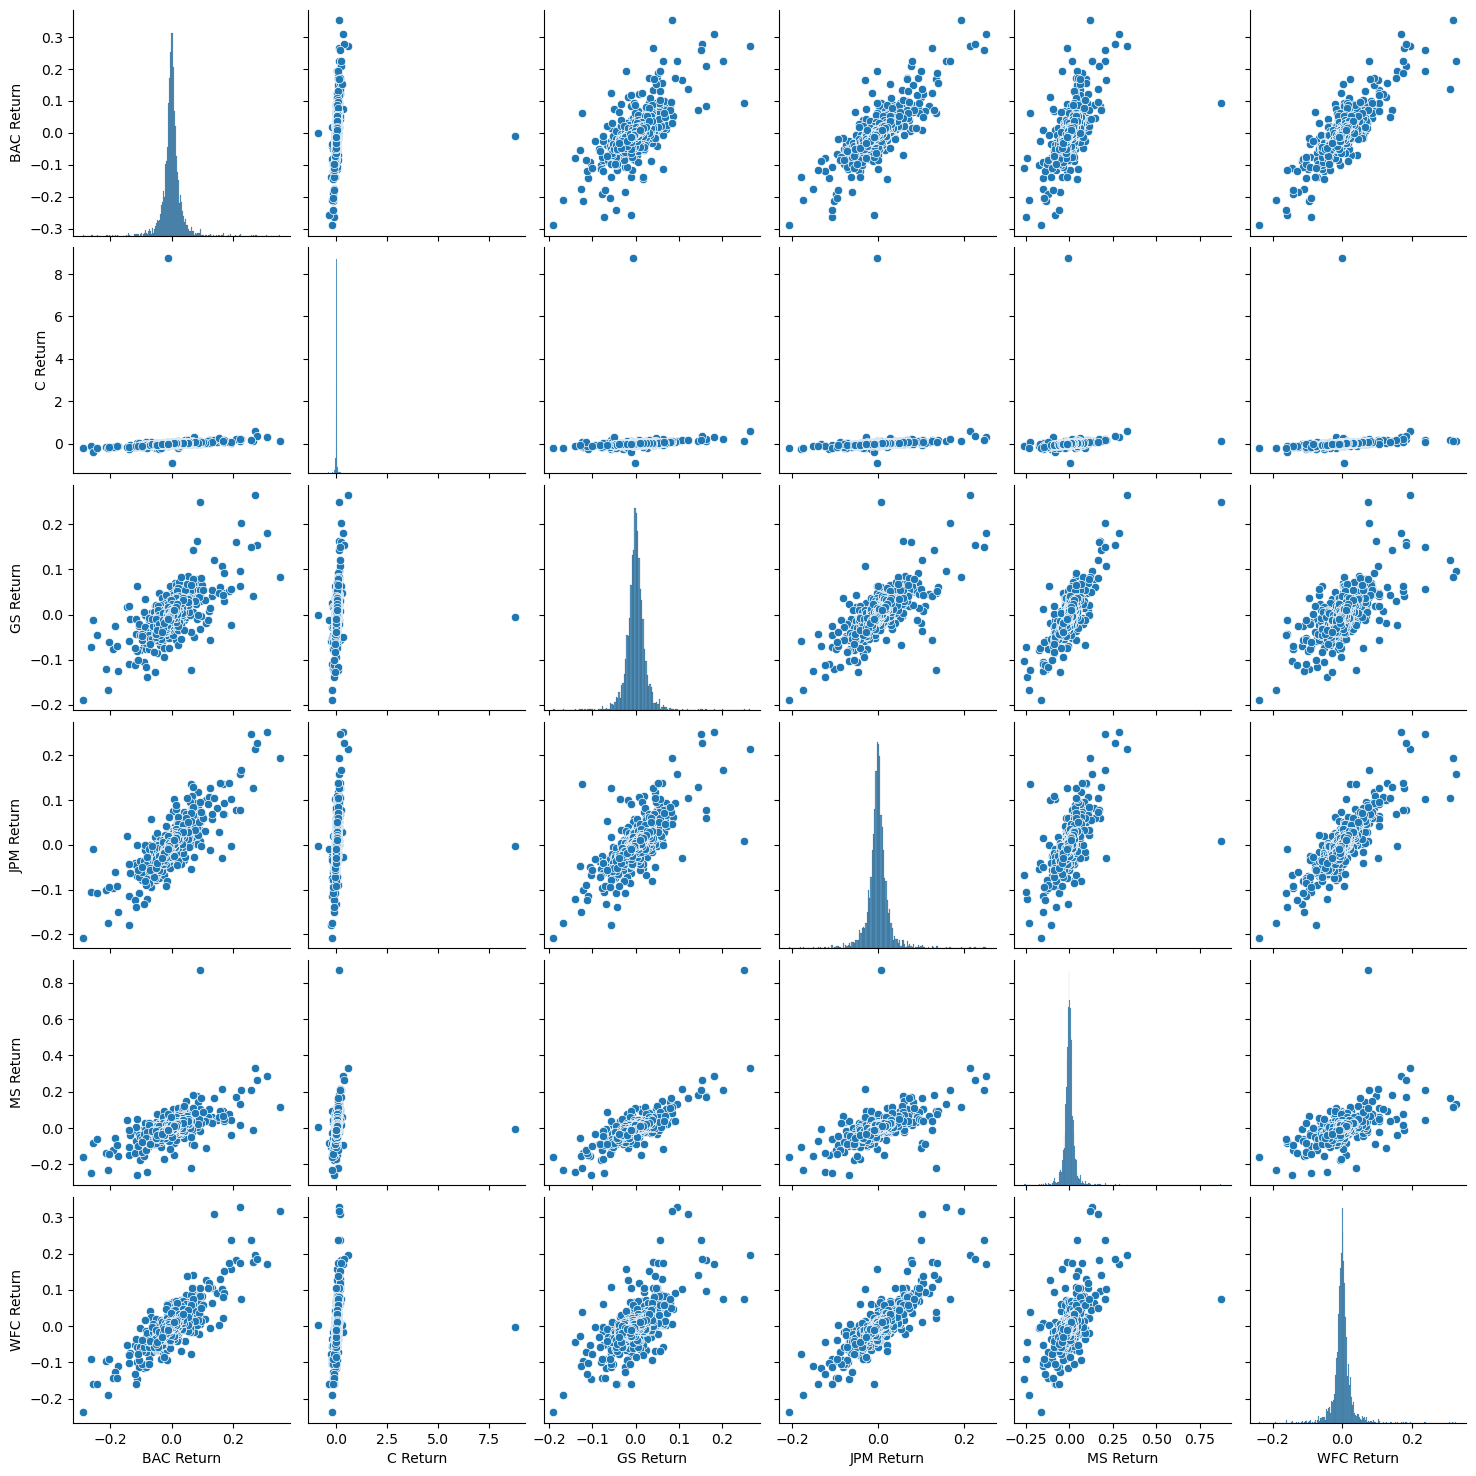

In [8]:
sns.pairplot(returns[1:])

##### On what dates each bank stock had the best and worst single day returns?

In [12]:
# Worst single day return
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [11]:
# Best single day returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

##### Riskest Stock ?

In [13]:
# Over the entire period
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [14]:
# in 2015
returns['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

##### 2015 returns for Morgan Stanley

Text(0.5, 1.0, '2015 Returns of Morgan Stanley')

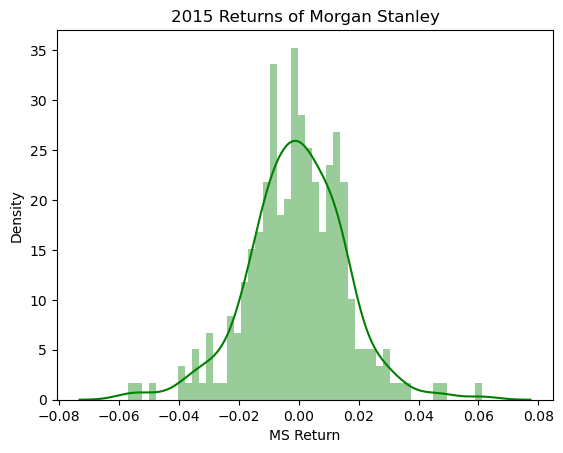

In [18]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'], color = 'green', bins = 50)

plt.title('2015 Returns of Morgan Stanley')

##### 2008 returns for CitiGroup

Text(0.5, 1.0, '2008 Returns of CitiGroup')

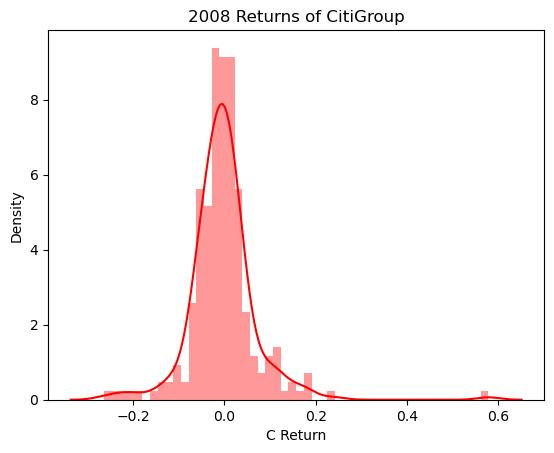

In [19]:
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'], color = 'red', bins = 50)

plt.title('2008 Returns of CitiGroup')

In [20]:
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

##### Close price for each bank

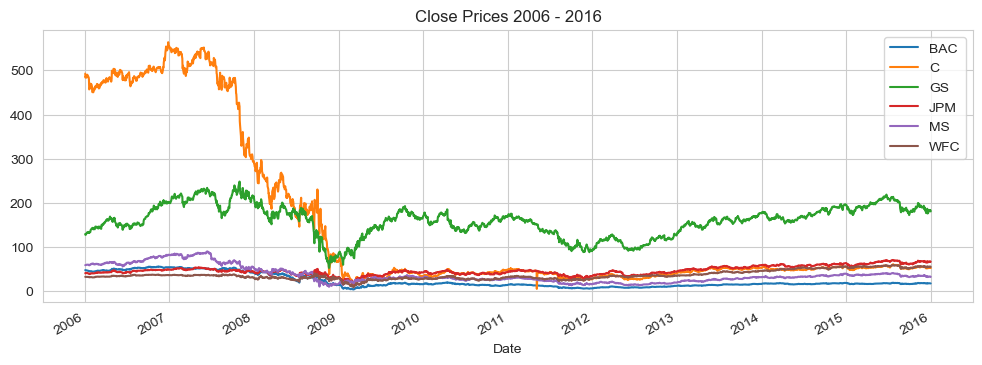

In [21]:
# Loop Method
for tick in tickers :
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (12, 4))

plt.title('Close Prices 2006 - 2016')
plt.legend()

Text(0.5, 1.0, 'Close Prices 2006 - 2016')

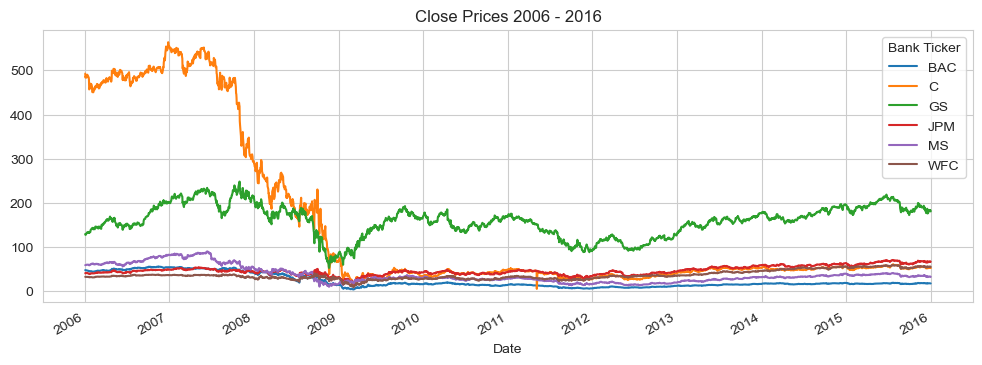

In [22]:
# .xs Method
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').plot(figsize = (12, 4))

plt.title('Close Prices 2006 - 2016')

In [23]:
# Plotly
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').iplot()

##### Rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

In [24]:
bank_stocks.xs(('Close', 'BAC'), axis = 1, level = ['Stock Info', 'Bank Ticker'])

Bank Ticker,BAC
Stock Info,Close
Date,
2006-01-03,47.08
2006-01-04,46.58
2006-01-05,46.64
2006-01-06,46.57
2006-01-09,46.60
...,...
2015-12-24,17.27
2015-12-28,17.13


In [25]:
BAC = bank_stocks.xs('BAC', axis = 1, level = 'Bank Ticker')
BAC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


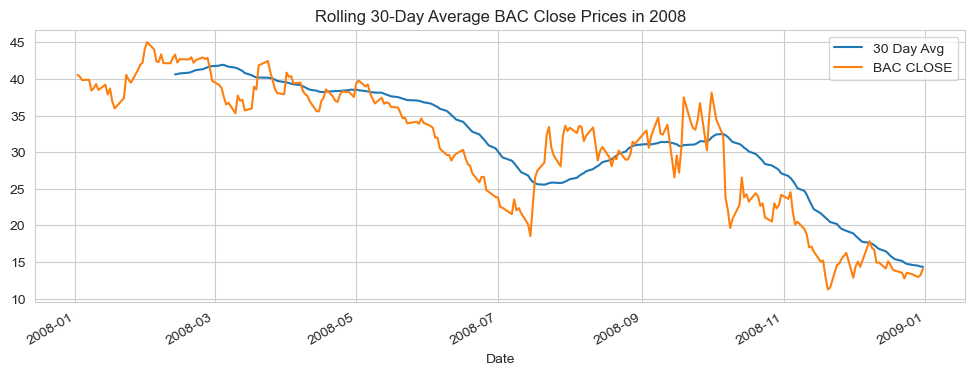

In [26]:
plt.figure(figsize = (12, 4))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = '30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label = 'BAC CLOSE')

plt.title('Rolling 30-Day Average BAC Close Prices in 2008')
plt.legend()

##### Correlation between the stocks' Close Price

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

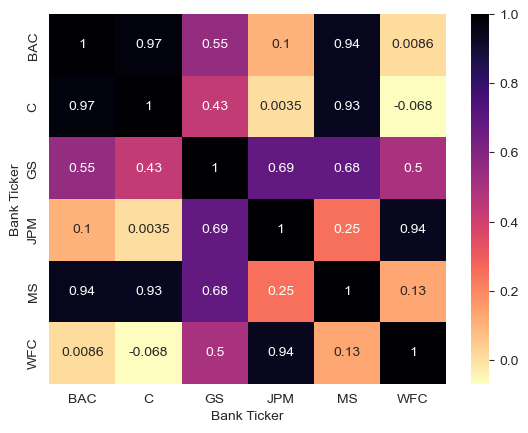

In [27]:
sns.heatmap(data = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, cmap = 'magma_r')

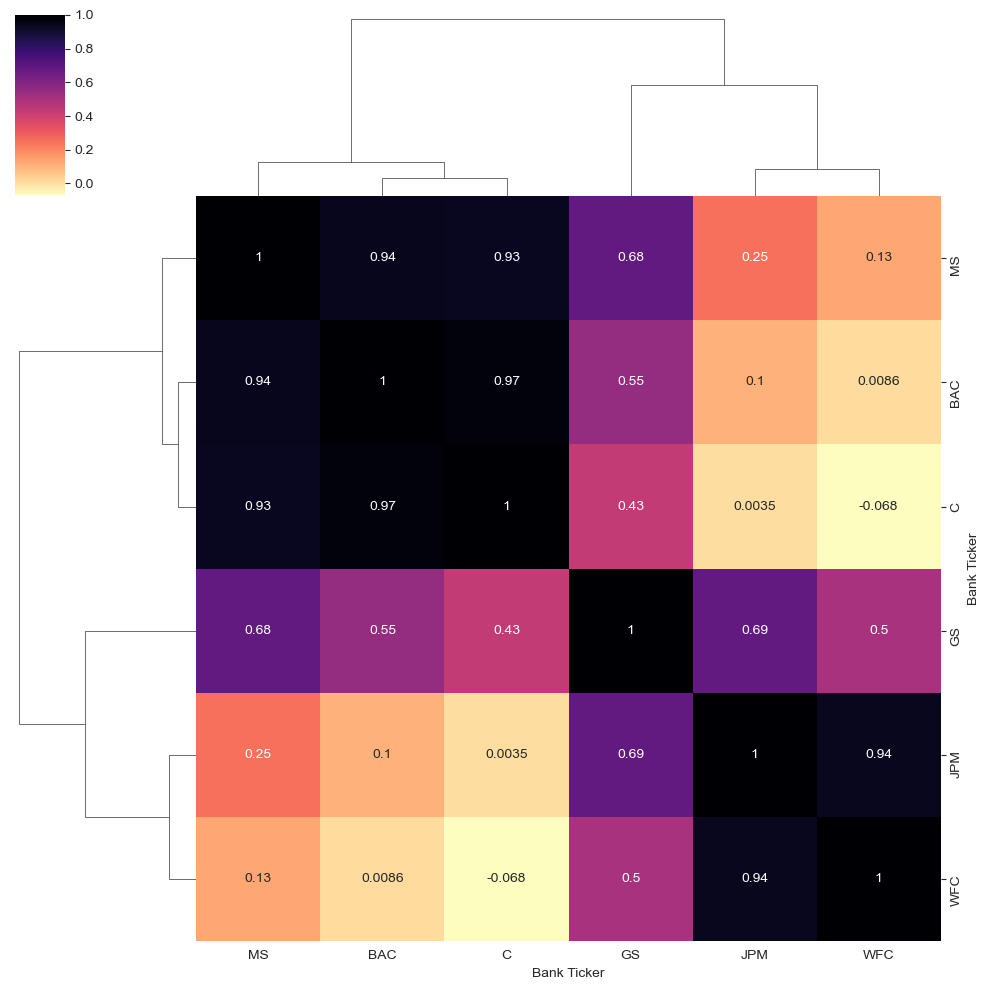

In [28]:
sns.clustermap(data = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, cmap = 'magma_r')

##### Bank of America's stock from 2015-2016

In [29]:
BAC = bank_stocks.xs(key = 'BAC', axis = 1, level = 'Bank Ticker')

In [30]:
BAC['2015-01-01':'2016-01-01'].iplot(kind = 'candle')

##### Simple moving averages of close prices Morgan Stanley 2015

In [31]:
MS = bank_stocks.xs(key = 'MS', axis = 1, level = 'Bank Ticker')

In [32]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

##### Bollinger Band Plot for closing prices of Bank of America in 2015

In [33]:
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')